In [1]:
import numpy
from matplotlib import pyplot

from shapely.geometry import Point, asPolygon

from rtree import index

In [2]:
def grid_tree(x, y, use_strtree=False):
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    x,y = map(lambda x : x.ravel(), numpy.meshgrid(x, y))
    sx = x[:,None] + (numpy.array([-0.5,0.5,0.5,-0.5])*dx)[None,:]
    sy = y[:,None] + (numpy.array([-0.5,-0.5,0.5,0.5])*dy)[None,:]
    p = numpy.append(sx, sy, axis=1).reshape(4,2,4).transpose(0,2,1)
    polygons = [asPolygon(_p) for _p in p]
    if use_strtree:
        return polygons, STRtree(polygons)
    
    tree = index.Index()
    for i, p in enumerate(polygons):
        tree.insert(i,p.bounds)      
    return polygons, tree

In [3]:
x = numpy.arange(2)
y = numpy.arange(2)
cells, tree = grid_tree(x, y)

In [4]:
p = Point(0,0).buffer(1, resolution=100)

In [19]:
p = Point(0,0).buffer(1, resolution=None)

ArgumentError: argument 4: <class 'TypeError'>: wrong type

In [12]:
import inspect
inspect.getmro(cells[0].__class__)

(shapely.geometry.polygon.PolygonAdapter,
 shapely.geometry.proxy.PolygonProxy,
 shapely.geometry.proxy.CachingGeometryProxy,
 shapely.geometry.polygon.Polygon,
 shapely.geometry.base.BaseGeometry,
 object)

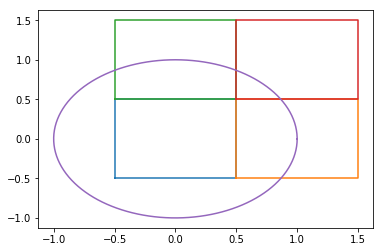

In [5]:
for c in cells:
    a = numpy.array(c.exterior.coords.xy)
    pyplot.plot(a[0], a[1])
a = numpy.array(p.exterior.coords.xy)
pyplot.plot(a[0], a[1])

In [8]:
for i in tree.intersection(p.bounds):
    print(cells[i].intersection(p).area)

1.0
0.45658999303252873
0.45658999303252873
0.07877587255850504


In [ ]:
intersected_cells = tree.query(p)
print(len(intersected_cells))
for c in intersected_cells:
    print(p.intersection(c).area)

In [ ]:
from rtree import index
idx = index.Index()

# Populate R-tree index with bounds of grid cells
for pos, cell in enumerate(grid_cells):
    # assuming cell is a shapely object
    idx.insert(pos, cell.bounds)

# Loop through each Shapely polygon
for poly in polygons:
    # Merge cells that have overlapping bounding boxes
    merged_cells = cascaded_union([grid_cells[pos] for pos in idx.intersection(poly.bounds)])
    # Now do actual intersection
    print poly.intersection(merged_cells).area

In [ ]:
p.area

In [ ]:
p.area/numpy.pi/100

In [ ]:
len(list(p.exterior.coords))

In [ ]:
x, y = numpy.meshgrid(numpy.arange(4)-0.5, numpy.arange(4)-0.5)

In [ ]:
x

In [ ]:
y

In [ ]:
y[0,2]

In [13]:
x = numpy.arange(9).reshape(3,3)

In [17]:
t = tuple(map(lambda x: x-1, x.shape))

In [18]:
t

(2, 2)